Q. wine.csv로 와의 품종을 예측하는 모델을 텐서플로/케라스로 아래와 같이 생성하고 학습 및 평가를 수행하세요.
- 입력층 :  Input 레이어 shape=(12,)
- 첫번째층 : 30, activation='relu'
- 두번째층 :12, activation='relu'
- 세번째층 :8, activation='relu'
- 출력층 :1, activation='sigmoid'

## 와인의 종류 예측하기

- 속성 12개 : 주석산 농도, 아세트산 농도, 구연산 농도, 잔류 당분 농도, 염화나트륨 농도, 유리 아황산 농도, 총 아황산 농도, 밀도, pH, 황산칼륨 농도, 알코올 도수, 와인의 맛(0~10등급), 클래스(1:레드 와인, 0: 화이트 와인)

### seed 설정
- NumPy의 무작위 작업에 대한 전역 제어를 위해 np.random.seed를 설정.
- np.random.seed(123)를 설정해도 스크립트를 실행할 때마다 정확히 동일한 학습 평가데이터 분할이 재현되도록 보장하려는 경우 train_test_split과 같은 scikit-learn 함수에 random_state를 지정.
- TensorFlow를 사용하는 경우 TensorFlow 작업에 tf.random.set_seed를 사용하며 신경망 레이어의 무작위 가중치 초기화, 훈련 프로세스의 임의성(예: , 이 특정 코드에 없는 드롭아웃 레이어를 사용하는 경우) 또는 임의성을 포함하는 기타 TensorFlow 작업을 사용하는 경우에 적용. 단순한 모델이나 특정 데이터 세트에 대해 훈련된 모델은 다양한 초기화에서 성능에 큰 변화를 나타내지 않을 수 있다
- Python 내장 random 모듈이 스크립트의 어느 곳에서나 사용되는 경우 해당 모듈의 시드를 설정. TensorFlow 작업 자체에 'python_random.seed(123)'를 직접 사용할 필요가 없지만 스크립트 시작 부분에 python_random.seed(123)를 설정하면 난수 생성을 위해 내장된 python random 모듈을 사용하는 모든 Python 작업에 영향을 미칠 수 있다.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import tensorflow as tf
import random as python_random

tf.random.set_seed(123)
np.random.seed(123)
python_random.seed(123)

In [15]:
df = pd.read_csv('/content/drive/MyDrive/KDT_2404/dataset/wine.csv', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [12]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [10]:
# 주석산 농도, 아세트산 농도, 구연산 농도, 잔류 당분 농도, 염화나트륨 농도, 유리 아황산 농도, 총 아황산 농도, 밀도, pH, 황산칼륨 농도, 알코올 도수, 와인의 맛(0~10등급), 클래스(1:레드 와인, 0: 화이트 와인)
# 입력층 : Input 레이어 shape=(12,)
# 첫번째층 : 30, activation='relu'
# 두번째층 :12, activation='relu'
# 세번째층 :8, activation='relu'
# 출력층 :1, activation='sigmoid'

df_corr = df.corr()

df_corr_sort = df_corr.sort_values(12, ascending=False)

df_corr_sort[12]

,12
12,1.000000
1,0.653036
4,0.512678
9,0.487218
0,0.486740
7,0.390645
8,0.329129
10,-0.032970
11,-0.119323
2,-0.187397


In [19]:
# 데이터를 분할합니다.
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)

# 모델을 설정합니다.
model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델을 학습시킵니다.
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.25)

# 모델을 평가합니다.
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Accuracy:', test_acc)


Epoch 1/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8796 - loss: 0.4091 - val_accuracy: 0.9431 - val_loss: 0.1877
Epoch 2/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9384 - loss: 0.1933 - val_accuracy: 0.9477 - val_loss: 0.1723
Epoch 3/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9422 - loss: 0.1763 - val_accuracy: 0.9485 - val_loss: 0.1642
Epoch 4/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9461 - loss: 0.1654 - val_accuracy: 0.9515 - val_loss: 0.1565
Epoch 5/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9483 - loss: 0.1568 - val_accuracy: 0.9523 - val_loss: 0.1507
Epoch 6/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9491 - loss: 0.1481 - val_accuracy: 0.9531 - val_loss: 0.1444
Epoch 7/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9511 - loss: 0.1407 - val_accuracy: 0.9538 - val_loss: 0.1398
Epoch 8/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9548 - loss: 0.1343 - val_accu

In [22]:
# 데이터를 분할합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)

# 모델을 설정합니다.
model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델을 학습시킵니다.
model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0)

# 모델을 평가합니다.
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Accuracy:', test_acc)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9438 - loss: 0.1789
Accuracy: 0.939230740070343


.keras 파일
- 기본적으로 TensorFlow의 SavedModel 형식을 따릅니다. 이는 TensorFlow의 공식 모델 저장 형식으로, 모델 아키텍처, 가중치, 그리고 훈련 구성(옵티마이저 상태 등)을 포함할 수 있습니다.

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint
# 모델 저장의 조건을 설정합니다.
modelpath = '/content/drive/MyDrive/KDT_2404/model/all/{epoch:02d}-{val_accuracy:.4f}.keras'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to /content/drive/MyDrive/KDT_2404/model/all/01-0.9438.keras

Epoch 2: saving model to /content/drive/MyDrive/KDT_2404/model/all/02-0.9438.keras

Epoch 3: saving model to /content/drive/MyDrive/KDT_2404/model/all/03-0.9438.keras

Epoch 4: saving model to /content/drive/MyDrive/KDT_2404/model/all/04-0.9438.keras

Epoch 5: saving model to /content/drive/MyDrive/KDT_2404/model/all/05-0.9446.keras

Epoch 6: saving model to /content/drive/MyDrive/KDT_2404/model/all/06-0.9446.keras

Epoch 7: saving model to /content/drive/MyDrive/KDT_2404/model/all/07-0.9454.keras

Epoch 8: saving model to /content/drive/MyDrive/KDT_2404/model/all/08-0.9454.keras

Epoch 9: saving model to /content/drive/MyDrive/KDT_2404/model/all/09-0.9446.keras

Epoch 10: saving model to /content/drive/MyDrive/KDT_2404/model/all/10-0.9454.keras

Epoch 11: saving model to /content/drive/MyDrive/KDT_2404/model/all/11-0.9454.keras

Epoch 12: saving model to /content/drive/MyDrive/KDT_2404/model/all/12-0.

## 그래프로 과적합 확인하기

History 객체

- 신경망 훈련을 위해 Keras 또는 TensorFlow 사용 시 model.fit()과 같은 호출로 훈련 작업을 실행하면 History 객체가 반환. 이 객체에는 연속적인 에포크의 훈련 손실 값과 측정항목 값 기록뿐만 아니라 해당하는 경우 검증 손실 값과 검증 측정항목 값도 포함.
- 코드에서 얻은 History 객체의 내용을 보려면 훈련 과정 중에 기록된 측정항목이 포함된 사전인 history 속성에 액세스. 'history.history.keys'의 각 키는 훈련 중에 모니터링된 측정항목에 해당

In [24]:
# 그래프 확인을 위한 긴 학습
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=0)

In [25]:
print(history.history.keys())

print(history.history['loss'])

print(history.history['val_loss'])

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
[0.12243048846721649, 0.12152077257633209, 0.12065856903791428, 0.11983190476894379, 0.1189495325088501, 0.11810015887022018, 0.11731518059968948, 0.11636479943990707, 0.11563651263713837, 0.11476205289363861, 0.11395381391048431, 0.11305321007966995, 0.11230616271495819, 0.11145040392875671, 0.11059341579675674, 0.1097109392285347, 0.1090262234210968, 0.10820744931697845, 0.10737189650535583, 0.10667486488819122, 0.10600883513689041, 0.10514932125806808, 0.10447584837675095, 0.10389114916324615, 0.1032586619257927, 0.10251201689243317, 0.10183838754892349, 0.10132291913032532, 0.10068682581186295, 0.1000785157084465, 0.09950213879346848, 0.09889504313468933, 0.09842030704021454, 0.09783328324556351, 0.09720203280448914, 0.09673091769218445, 0.09622164815664291, 0.09558815509080887, 0.09502499550580978, 0.09447534382343292, 0.09390316158533096, 0.09329947084188461, 0.09271563589572906, 0.0922352746129036, 0.09159695357084274, 

In [26]:
# history에 저장된 학습 결과를 확인해보겠습니다.
hist_df = pd.DataFrame(history.history)
hist_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.953041,0.122430,0.950769,0.135401
1,0.953041,0.121521,0.951538,0.134635
2,0.953554,0.120659,0.951538,0.133905
3,0.953297,0.119832,0.951538,0.133141
4,0.953297,0.118950,0.952308,0.132352


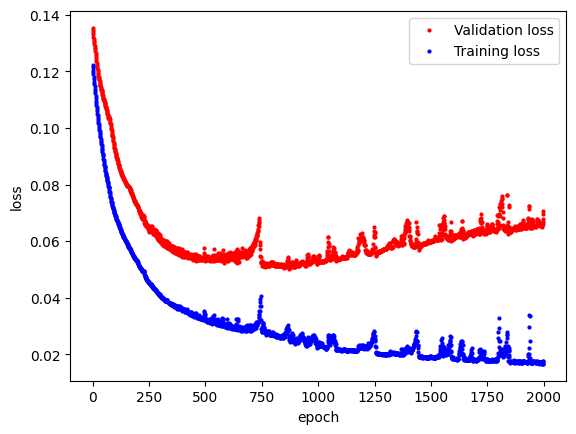

In [27]:
import matplotlib.pyplot as plt

# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# X 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c='red', markersize=2, label='Validation loss')
plt.plot(x_len, y_loss, "o", c='blue', markersize=2, label='Training loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

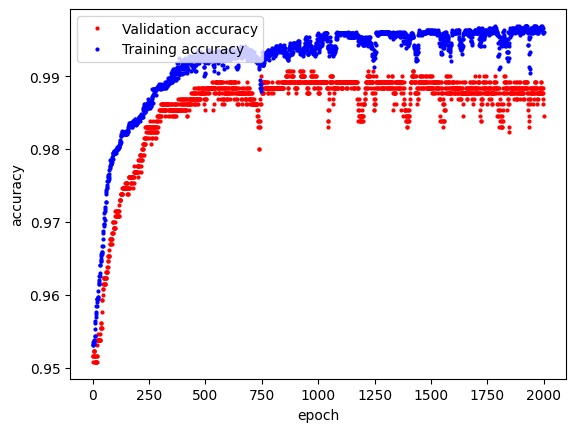

In [28]:
# history 객체에서 학습셋과 검증셋의 정확도를 가져옵니다.
# 'acc'대신 'accuracy'를 사용해야 할 수도 있습니다. 이는 keras 버전에 따라 다릅니다.
y_acc = history.history['accuracy'] # acc대신 accuracy를 사용하는 경우가 있습니다.
y_val_acc = history.history['val_accuracy'] # 마찬가지로 val_accuracy를 사용

# x 값을 지정합니다.
x_len = np.arange(len(y_acc))

# 검증셋의 정확도를 빨간색으로, 학습셋의 정확도를 파란색으로 표시합니다.
plt.plot(x_len, y_val_acc, "o", c="red", markersize=2, label="Validation accuracy")
plt.plot(x_len, y_acc, "o", c="blue", markersize=2, label="Training accuracy")

plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

## 학습의 자동중단

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd
import random as python_random

np.random.seed(123)  # Numpy module.
python_random.seed(123)  # Python random module.
tf.random.set_seed(123)  # TensorFlow module.

# 데이터를 입력합니다.
df = pd.read_csv('/content/drive/MyDrive/KDT_2404/dataset/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

[ callback ]

callbacks=[early_stopping_callback, checkpointer]

학습 과정 중에 특정 이벤트가 발생했을 때, 취할 행동을 정의.

- early_stopping_callback: 이 콜백은 모델의 성능이 더 이상 개선되지 않을 때 학습을 조기에 중단하도록 설정. 예를 들어, 검증 데이터에 대한 손실이 일정 기간 동안 개선되지 않으면 학습을 멈춘다. 이는 과적합을 방지하고 학습 시간을 단축시키는 데 도움이 된다.
- checkpointer: 이 콜백은 모델의 중간 학습 상태를 파일로 저장하여, 학습 과정에서 가장 좋은 모델을 보존할 수 있게 한다. 이를 통해 나중에 모델을 재사용하거나, 학습 과정이 끝난 후 최적의 모델 상태로 복원할 수 있다.

이 코드는 신경망 모델의 학습 과정을 세밀하게 제어하면서, 과적합을 방지하고, 학습 과정에서 모델의 최적 상태를 저장하는 방법을 보여준다.

## 학습의 자동 중단 및 최적화 모델 저장

In [30]:
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=30)

# 최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="/content/drive/MyDrive/KDT_2404/model/bestmodel.keras"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, epochs=500, batch_size=500, validation_split=0.25,
                    verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.2473 - loss: 20.9778 - val_accuracy: 0.2115 - val_loss: 14.9281
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2111 - loss: 12.6846 - val_accuracy: 0.1546 - val_loss: 8.0601
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1401 - loss: 6.4213 - val_accuracy: 0.1331 - val_loss: 2.5203
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3309 - loss: 1.7091 - val_accuracy: 0.7615 - val_loss: 0.7878
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7474 - loss: 0.8786 - val_accuracy: 0.7631 - val_loss: 0.9121
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7510 - loss: 0.9741 - val_accuracy: 0.7631 - val_loss: 0.8507
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7511 - loss: 0.8704 - val_accuracy: 0.7638 - val_loss: 0.6574
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7537 - loss: 0.6425 - val_accuracy: 0.7854 - val_loss

In [31]:
# 테스트 결과를 출력합니다.
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9903 - loss: 0.0343
Test accuracy: 0.9876922965049744


In [32]:
# 최적화된 모델이 bestmodel.keras 파일에 저장되면, 이 파일을 로드하여 예측 또는 추가 학습에 사용
from tensorflow.keras.models import load_model

# 저장된 모델 로드
best_model_path = '/content/drive/MyDrive/KDT_2404/model/bestmodel.keras'
best_model = load_model(best_model_path)

# 모델 요약 출력
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,627 (10.27 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,752 (6.85 KB)